In [30]:
import pandas as pd
import datetime
import time
from konlpy.tag import Okt
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
import nltk

import seaborn as sns
import platform
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates, ticker

from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [31]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [32]:
news = pd.read_csv("./CSV/05_news_title.csv")
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952789 entries, 0 to 1952788
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   날짜      object
 1   제목      object
dtypes: object(2)
memory usage: 29.8+ MB


In [33]:
news["날짜"] = pd.to_datetime(news["날짜"], format = "%Y-%m-%d")

In [34]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952789 entries, 0 to 1952788
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   날짜      datetime64[ns]
 1   제목      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 29.8+ MB


In [35]:
df_top300 = news.groupby("날짜").head(300)

In [36]:
df_top300.head(10)

,날짜,제목
0,2020-01-21,"[사설] 중국발 '우한 폐렴' 공포, 우리나라도 안전지대 아니다"
1,2020-01-21,춘절 기간 中관광객 13만명 오는데 ‘우한 폐렴’ 공항 방역 비상
2,2020-01-21,우한 폐렴 1명이 14명 감염 사스급 전염병 우려
3,2020-01-21,中 ‘우한 폐렴’ 정보 제공 인색 정부 “우리도 뉴스로 파악”
4,2020-01-21,하루 중국발 항공기로 3만명 입국하는데 질본 “다 볼 수 없다”
5,2020-01-21,"‘우한 폐렴’ 사망 4명 이어 16명도 위중, 감염자 총 224명"
6,2020-01-21,호주서도 우한폐렴 의심환자 발생 당국 검역 강화
7,2020-01-21,"의료진 감염, 사람 간 전염 中 폐렴 마지노선 뚫렸다"
8,2020-01-21,사람끼리 전염된다고? 설 명절 앞두고 커지는‘우한 폐렴’ 공포 [영상]
9,2020-01-21,"‘우한 폐렴’ 4번째 사망자 WHO 긴급위, 시진핑 긴급지시"


In [37]:
df_top300.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176973 entries, 0 to 1950226
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   날짜      176973 non-null  datetime64[ns]
 1   제목      176973 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 4.1+ MB


In [38]:
start = time.time()

title = ""
for idx, val in enumerate(df_top300["제목"]) :
    title = title + val + " "
    if idx % 10000 == 0 :
        print(idx, val)

print("title length :", len(title))
print("소요시간 :", time.time() - start)

0 [사설] 중국발 '우한 폐렴' 공포, 우리나라도 안전지대 아니다
10000 김부겸 “대구 지원 절실한데 퍼주기라고? 황교안, 심각성 인식 못해”
20000 인천 강화군, ‘2020년 고려산 진달래 축제’ 전면 취소
30000 중계도 눈높이 맞춰 직관 같은 ‘집관’ 프로젝트
40000 홍성군 보건소, 코로나19로 잠정중단된 진료업무 재개
50000 [천안 다문화]천안시다문화가족지원센터 방문교육 사업설명회 개최
60000 예산읍 바살協, 열무김치 나눔 봉사활동
70000 질병관리청과 정은경 청장에 거는 기대
80000 “여성 지휘자라 어려웠냐고? 별로! 중요한 건 단원들과의 관계”
90000 고교 선택 앞둔 중3을 위한 분당지역 고교 탐방_ 보평고등학교
100000 예산군, 예당호 출렁다리 및 음악분수 홈페이지 오픈
110000 [삶과 문화] 이름 모를 누군가에게 남긴 빵 한 덩이
120000 전남교육청, 제한적 공동학구제 확대 시행
130000 선거운동 첫 주말 박영선 선거운동 일시 중단
140000 ​터키, 코로나19 일일 사망자 394명 기록 역대 최대
150000 구미대 학생, 국제 브루어스컵 챔피언십 금 은 동 휩쓸어
160000 ​[코로나19] 오후 9시까지 659명 확진 6일도 700명대 예상
170000 오바마, 생일파티 규모 줄였다더니 
title length : 5484652
소요시간 : 314.79425573349


In [39]:
title[:100]

"[사설] 중국발 '우한 폐렴' 공포, 우리나라도 안전지대 아니다 춘절 기간 中관광객 13만명 오는데 ‘우한 폐렴’ 공항 방역 비상 우한 폐렴 1명이 14명 감염 사스급 전염병 우려"

In [40]:
t = Okt()
doc_nouns = t.nouns(title)
print(len(doc_nouns))

1376778


In [41]:
ko = nltk.Text(doc_nouns, name = "코로나 키워드 뉴스 제목")

In [51]:
print(len(ko.tokens), type(ko.tokens))
print(ko.tokens[0 : 30])
print(ko.vocab().most_common(20))

1376778 <class 'list'>
['사설', '중국', '발', '우한', '폐렴', '공포', '우리나라', '안전지대', '춘절', '기간', '관광객', '우한', '폐렴', '공항', '방역', '비상', '우한', '폐렴', '명', '명', '감염', '사스', '전염병', '우려', '우한', '폐렴', '정보', '제공', '인색', '정부']
[('코로나', 38718), ('명', 23937), ('확진', 11858), ('확', 9177), ('진자', 9054), ('백신', 7756), ('감염', 7000), ('지원', 6233), ('울산', 6087), ('지역', 5883), ('방역', 5854), ('확산', 5022), ('접종', 4966), ('신규', 4828), ('대전', 4353), ('등', 4110), ('추가', 4036), ('개최', 3819), ('차', 3789), ('마스크', 3535)]


In [43]:
most_fre = ko.vocab().most_common(50)
most_fre

[('코로나', 38718),
 ('명', 23937),
 ('확진', 11858),
 ('확', 9177),
 ('진자', 9054),
 ('백신', 7756),
 ('감염', 7000),
 ('지원', 6233),
 ('울산', 6087),
 ('지역', 5883),
 ('방역', 5854),
 ('확산', 5022),
 ('접종', 4966),
 ('신규', 4828),
 ('대전', 4353),
 ('등', 4110),
 ('추가', 4036),
 ('개최', 3819),
 ('차', 3789),
 ('마스크', 3535),
 ('제', 3512),
 ('운영', 3467),
 ('위', 3370),
 ('한국', 3362),
 ('회', 3205),
 ('사업', 3203),
 ('센터', 3076),
 ('대통령', 3026),
 ('발생', 3018),
 ('신종', 2978),
 ('첫', 2976),
 ('속보', 2892),
 ('정부', 2872),
 ('중', 2869),
 ('거리', 2869),
 ('대구', 2701),
 ('사회', 2693),
 ('온라인', 2673),
 ('극복', 2644),
 ('집단', 2624),
 ('검사', 2574),
 ('사랑', 2550),
 ('교육', 2549),
 ('두기', 2548),
 ('병원', 2511),
 ('우한', 2503),
 ('광주', 2477),
 ('사설', 2461),
 ('세', 2457),
 ('오후', 2431)]

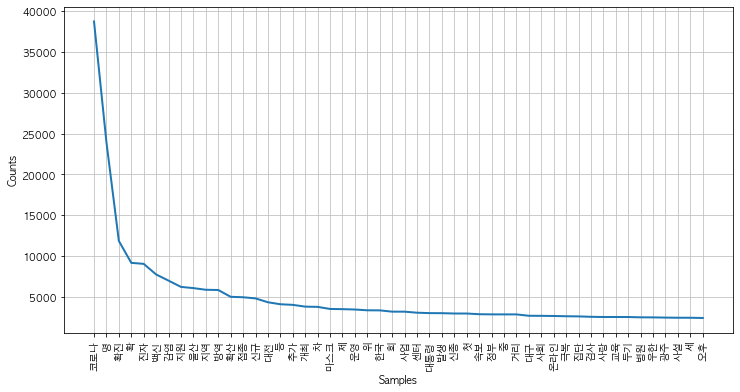

In [44]:
plt.figure(figsize = (12, 6))
ko.plot(50)
plt.show()

In [45]:
stopwords = ["코로나", "확", "진자", "세", "중", "차", "회", "위", "등", "더", "제"]

new_ko = []
for one_word in ko :
    if one_word not in stopwords :
        new_ko.append(one_word)

In [46]:
len(new_ko)

1294402

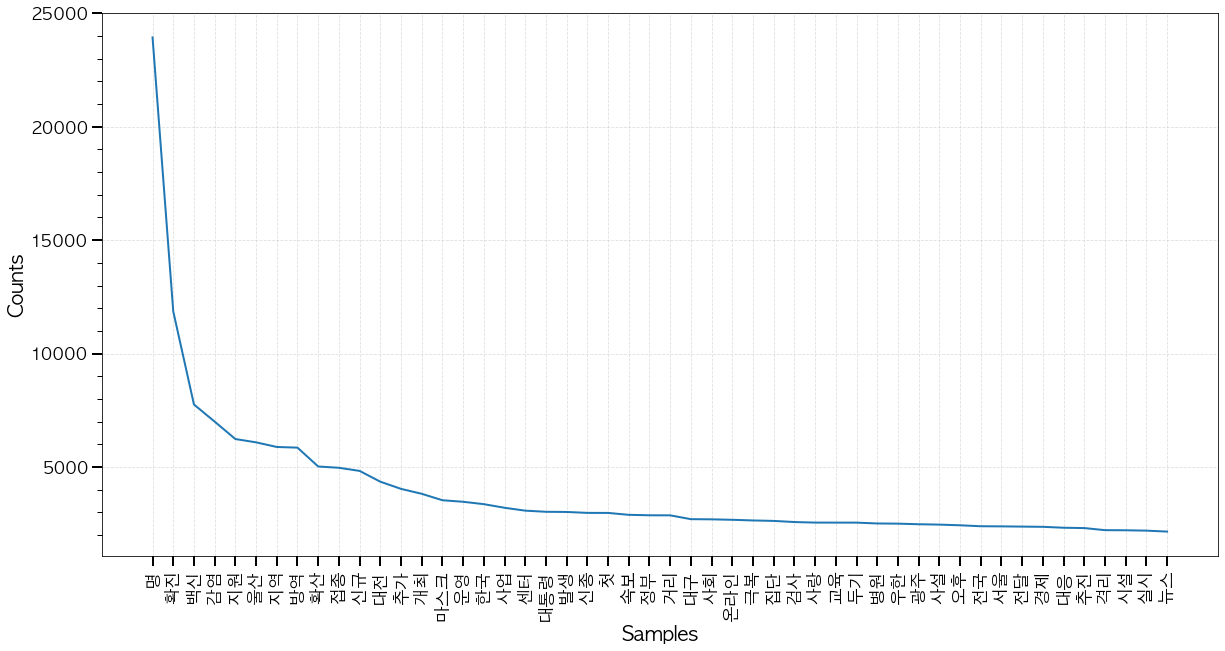

In [65]:
new_ko = nltk.Text(new_ko, name = "코로나 키워드 뉴스 제목2")

plt.rcParams["figure.figsize"] = (20, 10)
# plt.rcParams["axes.labelsize"] = 20
# plt.rc("axes", labelsize = 20)
plt.grid(True, axis = "both", alpha = 0.5, linestyle = "--")

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval = 1))
# plt.xticks(pd.date_range(start = "2020-01-01", end = "2021-09-01", freq = "MS"))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5000)) ## y값이 0.25의 배수인 경우마다 메인 눈금 표시
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:f'{100*x:.0f}%')) ## 메인 눈금 표시형식
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000)) ## y축 서브 눈금 표시

ax.tick_params(axis = "both", which = "major", length = 10, width = 2)
ax.tick_params(axis = "x", which = "major", labelsize = 17, rotation = 20)
ax.tick_params(axis = "y", which = "major", labelsize = 17)
ax.tick_params(axis = "x", which = "minor", length = 5, width = 1)
ax.tick_params(axis = "y", which = "minor", length = 5, width = 1)

plt.xlabel("상위 50개 단어", fontsize = 20)
plt.ylabel("빈도수", fontsize = 20)

new_ko.plot(50)
# plt.gcf().savefig("./PNG/1일당 300개 뉴스 데이터 빈도수 높은 상위 50개.png")

### 텍스트의 단어 분포 확인(dispersion_plot)

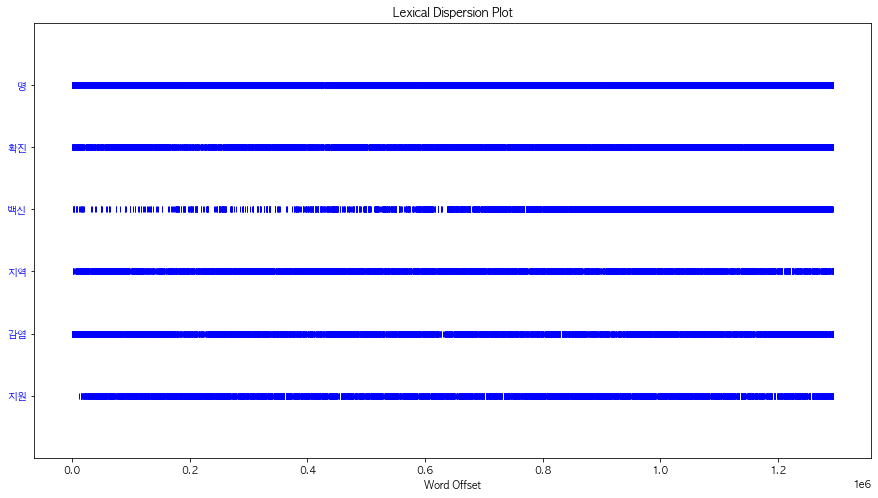

In [48]:
plt.figure(figsize = (15, 8))
new_ko.dispersion_plot(["명", "확진", "백신", "지역", "감염", "지원"])

In [49]:
cloud_mask = np.array(Image.open("./PNG/cloud_icon6.png"))

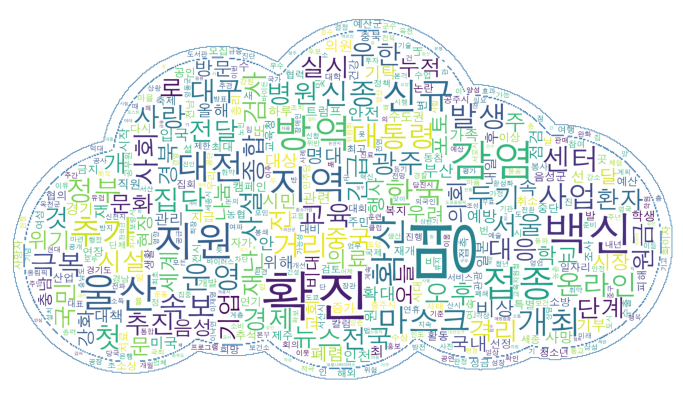

In [66]:
data = new_ko.vocab().most_common(1000)

wc = WordCloud(background_color = "white", 
               max_words = 500,
               mask = cloud_mask,
               font_path = '/Library/Fonts/AppleGothic.ttf',
               contour_width = 2,
               contour_color = "steelblue",
               max_font_size = 300).generate_from_frequencies(dict(data))

plt.figure(figsize = (12, 8))
plt.imshow(wc)
plt.axis("off")
plt.gcf().savefig("./PNG/1일당 300개 뉴스 데이터 빈도수 높은 상위 50개 wordcloud.png")
plt.show()

'C:/Windows/Fonts/malgun.ttf'